In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\amith\Downloads\house_prices.csv")

In [4]:
print(df.head())

print(df.isnull().sum())


df['Size'].fillna(df['Size'].mean(), inplace=True)
df['Number of Rooms'].fillna(df['Number of Rooms'].mean(), inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Price'].fillna(df['Price'].mean(), inplace=True)

   Size Location  Number of Rooms   Price
0  1946    Rural                3  325928
1   569    Urban                1  201662
2  2951    Urban                4  604369
3  1135    Urban                1  253526
4   561    Urban                4  366727
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


C:\Users\amith\AppData\Local\Temp\ipykernel_25128\2521586757.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].mean(), inplace=True)
C:\Users\amith\AppData\Local\Temp\ipykernel_25128\2521586757.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

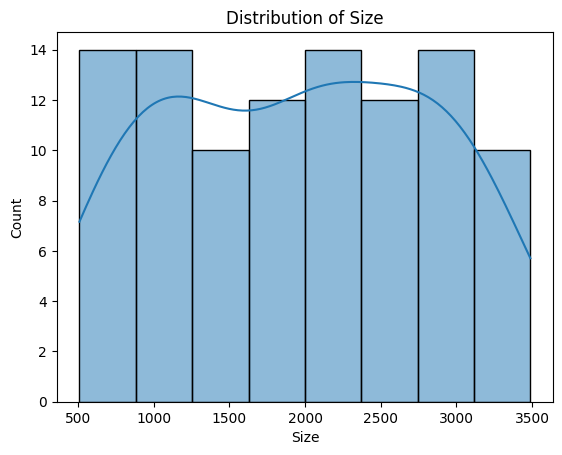

In [5]:
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.show()

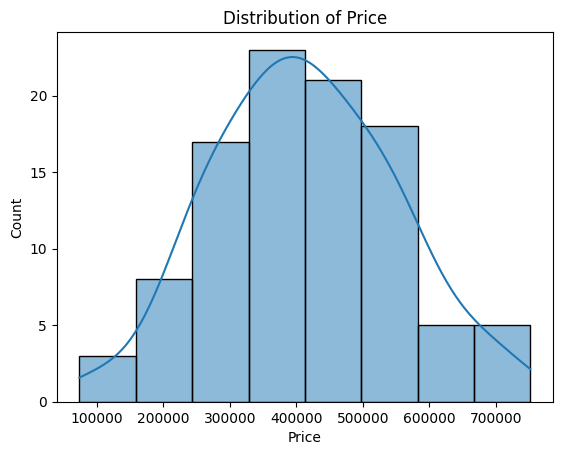

In [6]:

sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

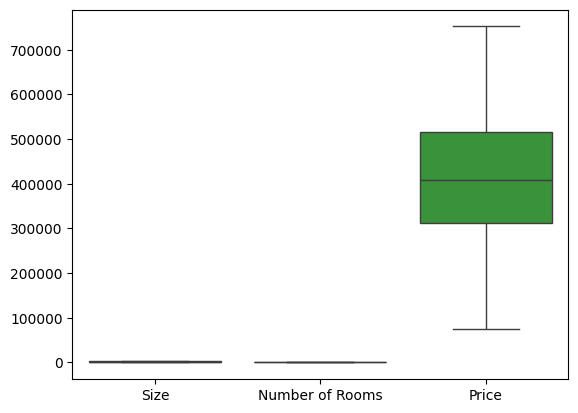

In [7]:
sns.boxplot(data=df[['Size', 'Number of Rooms', 'Price']])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])


In [9]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

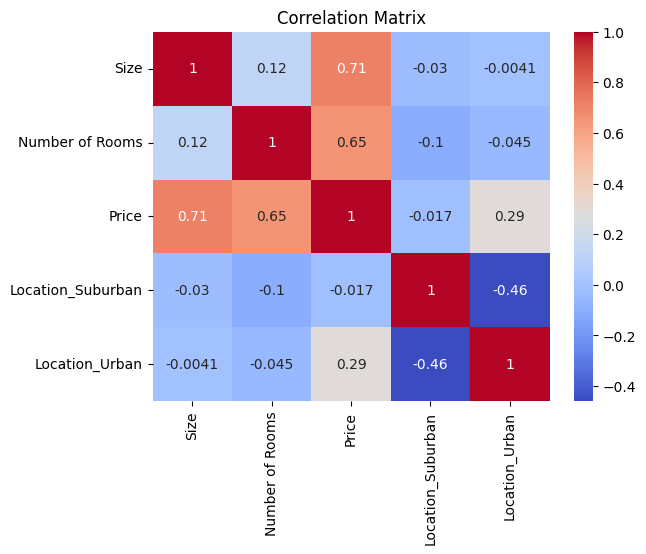

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 12269.76
R² Score: 0.99
